**ĐỒ ÁN KẾT THÚC MÔN PHÂN TÍCH DỮ LIỆU**

**ĐỀ TÀI: Phân tích các yếu tố ảnh hưởng đến giá căn hộ chung cư  tại TP HCM**

SINH VIÊN THỰC HIỆN

1. NGUYỄN MINH TÙNG - 23730223

2. NGUYỄN THANH NGUYÊN VŨ - 23730225

3. NGUYỄN THÀNH DANH - 23730160

4. LÊ ĐỨC TOÀN - 23730218

#PHẦN 1: TỔNG QUAN VÀ KHỞI TẠO

##1. Giới thiệu

###Đề tài: Phân tích các yếu tố ảnh hưởng đến giá căn hộ chung cư tại TP.HCM.

Các bước nhóm thực hiện:

Thu thập dữ liệu từ website chotot.com (file crawl dữ liệu riêng)

Làm sạch và xử lý dữ liệu .

Trực quan hóa để tìm ra các xu hướng giá.

Xây dựng mô hình máy học (Machine Learning) để dự đoán giá nhà.

Đưa ra kiến nghị cho người mua/bán và nhà đầu tư.

#2. Import thư viện và Cấu hình

Sau khi chạy file test nhóm sẽ gom các thư viện về thành 1 cell trong file Final để dễ quản lý

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings

# Cấu hình hiển thị
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tránh hiển thị dạng khoa học (e+09)

#PHẦN 2: THU THẬP VÀ TIỀN XỬ LÝ DỮ LIỆU

##1. Tải và Đọc dữ liệu

In [2]:
# Đọc dữ liệu, nhóm vui lòng upload file này trước khi chạy cell này
try:
    df = pd.read_csv("data_bds_1.csv")
    print("Đọc file thành công!")
    display(df.head(3))
except:
    print("Vui lòng upload file data_bds_1.csv")

Đọc file thành công!


,tieu_de,gia,gia_hien_thi,gia_m2,dien_tich,huong_nha,huong_ban_cong,noi_that,phap_ly,ten_du_an,so_phong,so_wc,duong,phuong,quan,thanh_pho,latitude,longitude,khoang_cach_q1_km,ngay_dang,nguoi_ban,loai_tin,link
0,"CHUYÊN GIÁ TỐT Q7 RIVERSIDE: 2PN 68M2 3.68TỶ, ...",3680000000,"3,68 tỷ",54.12,68.00,NaN,NaN,NaN,5.00,Saigon Riverside Complex Q7,2,2.00,Đào Trí,Phường Phú Thuận,Quận 7,Tp Hồ Chí Minh,10.72,106.74,7.59,2025-12-23,Nhật Hạ,s,https://www.chotot.com/127863005.htm
1,"15/12 thông báo nộp hồ sơ ra sổ, bán nhanh căn...",2150000000,"2,15 tỷ",39.09,55.00,NaN,NaN,NaN,5.00,Sài Gòn Intela,2,NaN,Nguyễn Văn Linh,Xã Phong Phú,Huyện Bình Chánh,Tp Hồ Chí Minh,10.71,106.64,9.46,2025-12-23,Mai Xuân Nol,s,https://www.chotot.com/129578551.htm
2,2PN Moolight trả trước 700 nhận nhà liền,2700000000,"2,7 tỷ",48.21,56.00,NaN,NaN,2.00,2.00,Moonlight Boulevard,2,1.00,Kinh Dương Vương,Phường An Lạc A,Quận Bình Tân,Tp Hồ Chí Minh,10.74,106.61,10.30,2025-12-23,Hạnh Nguyễn,s,https://www.chotot.com/116016622.htm


In [3]:
#Kiểm tra lại dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tieu_de            2400 non-null   object 
 1   gia                2400 non-null   int64  
 2   gia_hien_thi       2400 non-null   object 
 3   gia_m2             2400 non-null   float64
 4   dien_tich          2400 non-null   float64
 5   huong_nha          443 non-null    float64
 6   huong_ban_cong     530 non-null    float64
 7   noi_that           1382 non-null   float64
 8   phap_ly            2398 non-null   float64
 9   ten_du_an          1838 non-null   object 
 10  so_phong           2400 non-null   int64  
 11  so_wc              2136 non-null   float64
 12  duong              2400 non-null   object 
 13  phuong             2387 non-null   object 
 14  quan               2400 non-null   object 
 15  thanh_pho          2400 non-null   object 
 16  latitude           2400 

In [ ]:
df.describe()

,gia,gia_m2,dien_tich,huong_nha,huong_ban_cong,noi_that,phap_ly,so_phong,so_wc,latitude,longitude,khoang_cach_q1_km
count,2400.00,2400.00,2400.00,443.00,530.00,1382.00,2398.00,2400.00,2136.00,2400.00,2400.00,2400.00
mean,5337311509.01,68.22,77.07,4.89,4.76,2.11,5.45,2.21,1.84,10.77,106.69,8.28
std,15816707474.47,311.54,41.34,2.16,2.10,0.79,1.05,1.07,0.78,0.05,0.07,4.16
min,1350000.00,0.02,10.00,1.00,1.00,1.00,1.00,1.00,1.00,10.60,106.51,0.17
25%,2700000000.00,42.68,56.46,3.00,3.00,1.00,5.00,2.00,1.00,10.73,106.64,5.19
50%,3600000000.00,53.75,69.00,5.00,5.00,2.00,6.00,2.00,2.00,10.77,106.69,7.87
75%,5400000000.00,69.46,85.00,7.00,6.00,3.00,6.00,2.00,2.00,10.80,106.74,10.74
max,699000000000.00,15195.65,724.47,8.00,8.00,4.00,6.00,11.00,7.00,10.89,106.88,21.94


##2. Làm sạch dữ liệu (Data Cleaning)

Mô tả thực hiện:

Loại bỏ các cột thiếu quá nhiều dữ liệu (>80%) như huong_nha, huong_ban_cong.

Loại bỏ các cột định danh không có giá trị cho mô hình: link, nguoi_ban, tieu_de.

Loại bỏ các giá trị Object không cần thiết : gia_hien_thi, tieu de, v.v....

Xử lý giá trị thiếu (NaN): Điền số WC bằng trung vị.

Chuẩn hóa dữ liệu: Chuyển đổi mã số của phap_ly, noi_that thành văn bản dễ hiểu.

In [4]:
# 1. Xóa cột không cần thiết
cols_to_drop = ['huong_nha', 'huong_ban_cong', 'gia_hien_thi',
                'nguoi_ban', 'ngay_dang', 'loai_tin', 'link', 'tieu_de',
                'duong', 'phuong', 'thanh_pho', 'latitude', 'longitude']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 2. Map giá trị số sang chữ cho dễ hiểu
phap_ly_mapping = {2: "Dang_cho_so", 4: "Hop_dong_dat_coc", 5: "Hop_dong_mua_ban", 6: "So_hong_rieng"}
noi_that_mapping = {1: "Cao_cap", 2: "Day_du", 3: "Co_ban", 4: "Tho"}

df_clean['phap_ly'] = df_clean['phap_ly'].map(phap_ly_mapping).fillna("Khac")
df_clean['noi_that'] = df_clean['noi_that'].map(noi_that_mapping).fillna("Khong_noi_that")

# 3. Xử lý Missing Values
df_clean['so_wc'] = df_clean['so_wc'].fillna(df_clean['so_wc'].median())
df_clean = df_clean.dropna(subset=['gia', 'dien_tich'])

print(f"Kích thước dữ liệu sau làm sạch: {df_clean.shape}")

Kích thước dữ liệu sau làm sạch: (2400, 10)


##3. Xử lý Ngoại lệ (Outlier Handling)

Mô tả thực hiện:

Dùng phương pháp IQR để lọc bỏ các căn hộ có giá hoặc diện tích quá lớn/quá nhỏ bất thường.

Lọc theo nghiệp vụ: Giá > 500 triệu và Diện tích > 20m2 (loại bỏ tin rác/ảo).

In [5]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

print(f"Số dòng trước khi lọc: {len(df_clean)}")

# Lọc ngoại lệ
df_clean = remove_outliers(df_clean, 'gia')
df_clean = remove_outliers(df_clean, 'dien_tich')
# Lọc theo logic thực tế
df_clean = df_clean[(df_clean['gia'] > 500000000) & (df_clean['dien_tich'] > 20)]

print(f"Số dòng sau khi lọc: {len(df_clean)}")

Số dòng trước khi lọc: 2400
Số dòng sau khi lọc: 2093


Nhận xét (Bước Tiền xử lý):

Dữ liệu BĐS thường nhiễu, việc loại bỏ các cột thiếu nhiều dữ liệu giúp mô hình ổn định hơn.

Việc lọc ngoại lệ (Outliers) giúp loại bỏ các căn biệt thự siêu sang hoặc tin ảo, giúp mô hình tập trung dự báo chính xác cho phân khúc căn hộ phổ thông và trung cấp.

#PHẦN 3: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)

##Trực quan hóa dữ liệu

Mô tả thực hiện:

Xem phân phối giá.

Xem tương quan giữa Diện tích và Giá.

So sánh giá trung bình giữa các Quận.

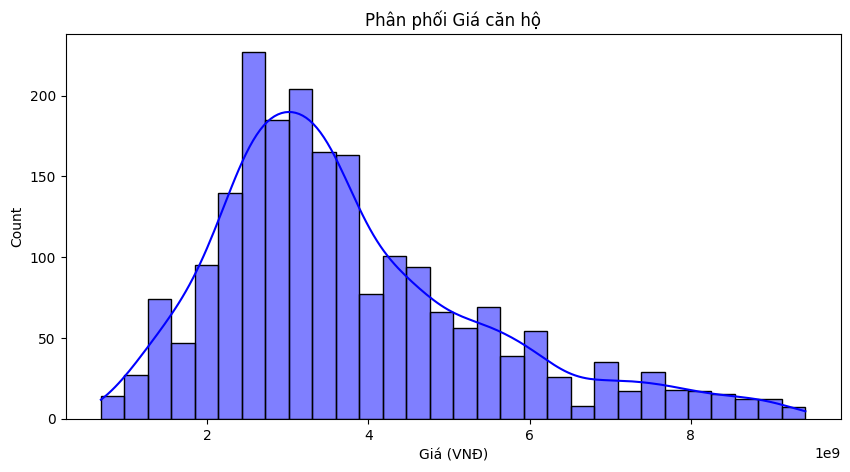

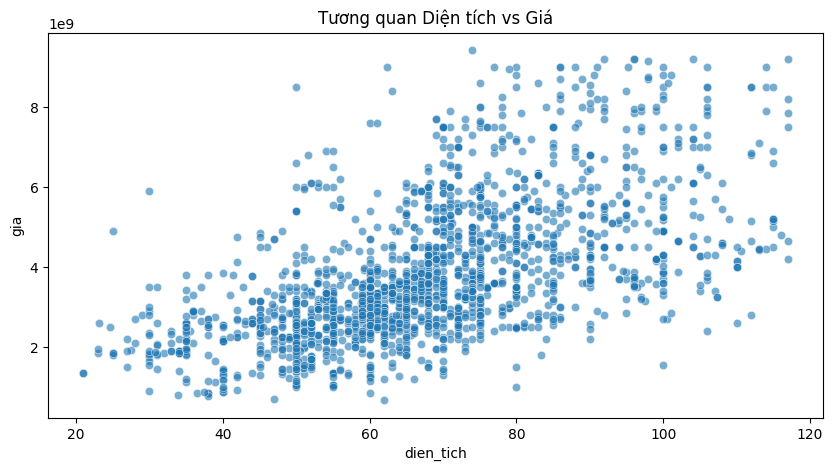

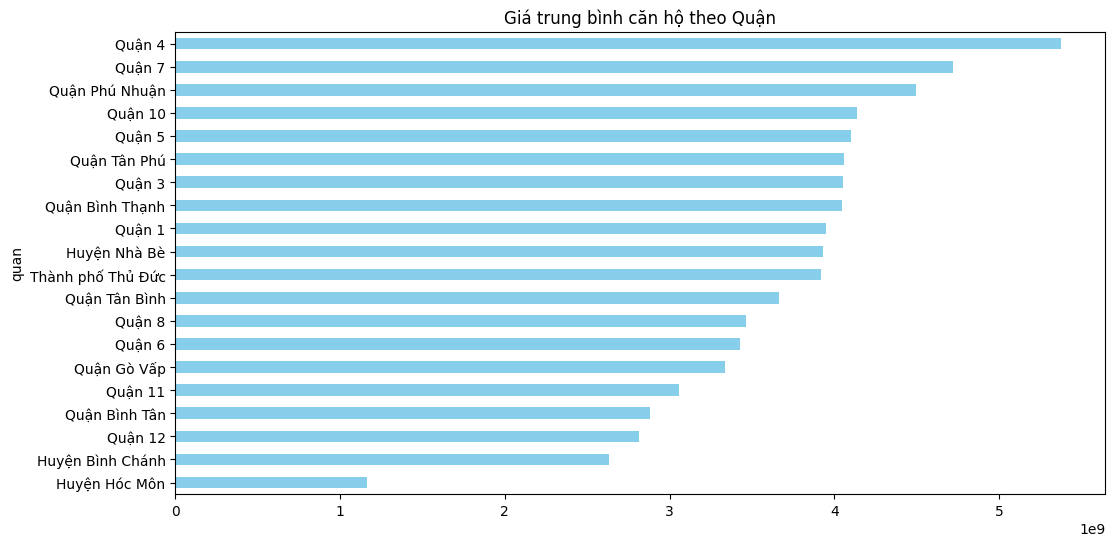

In [6]:
# 1. Phân phối Giá
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['gia'], kde=True, bins=30, color='blue')
plt.title('Phân phối Giá căn hộ')
plt.xlabel('Giá (VNĐ)')
plt.show()

# 2. Tương quan Diện tích vs Giá
plt.figure(figsize=(10, 5))
sns.scatterplot(x='dien_tich', y='gia', data=df_clean, alpha=0.6)
plt.title('Tương quan Diện tích vs Giá')
plt.show()

# 3. Giá trung bình theo Quận
plt.figure(figsize=(12, 6))
avg_price_district = df_clean.groupby('quan')['gia'].mean().sort_values()
avg_price_district.plot(kind='barh', color='skyblue')
plt.title('Giá trung bình căn hộ theo Quận')
plt.show()

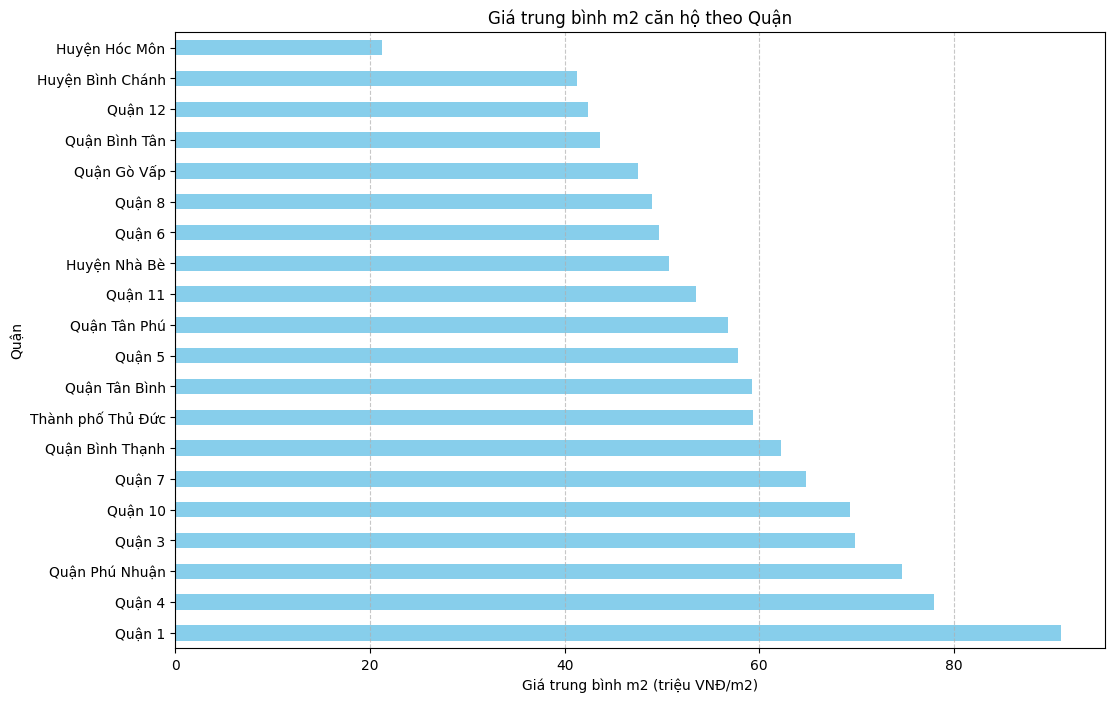

In [8]:
# 4. Giá trung bình theo Quận
plt.figure(figsize=(12, 8))
avg_price_m2_district.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Giá trung bình m2 căn hộ theo Quận')
plt.xlabel('Giá trung bình m2 (triệu VNĐ/m2)')
plt.ylabel('Quận')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Nhận xét (Bước EDA):

Giá: Phân phối lệch phải, tập trung nhiều ở mức 2 - 4 tỷ đồng.

Diện tích: Có tương quan tuyến tính dương rõ rệt với giá (Diện tích tăng -> Giá tăng).

Vị trí: Có sự phân hóa lớn. Quận 1, Quận 7 giá cao vượt trội so với Bình Chánh hay Hóc Môn. Điều này cho thấy "Quận" là một biến cực kỳ quan trọng (Key Feature).

#PHẦN 4: FEATURE ENGINEERING (TẠO ĐẶC TRƯNG)

##Mô tả thực hiện:

Rank Quận: Chuyển đổi tên Quận thành con số đại diện cho "độ đắt đỏ" (Giá trung bình/m2 của quận đó). Kỹ thuật này gọi là Target Encoding.

Tổng tiện ích: Tạo biến mới bằng tổng số phòng ngủ + số WC.

One-Hot Encoding: Mã hóa các biến phân loại (phap_ly, noi_that) thành dạng số (0/1).

In [ ]:
# 1. Tạo biến Rank Quận (Giá trung bình m2 theo quận)
price_per_m2_dict = df_clean.groupby('quan')['gia_m2'].mean().to_dict()
df_clean['rank_quan'] = df_clean['quan'].map(price_per_m2_dict)

# 2. Tạo biến Tổng tiện ích
df_clean['tong_tien_ich'] = df_clean['so_phong'] + df_clean['so_wc']


Nhận xét: Việc thay thế tên Quận bằng rank_quan giúp mô hình hiểu được thứ tự giá trị của vị trí, tốt hơn việc chỉ để mã số ngẫu nhiên.

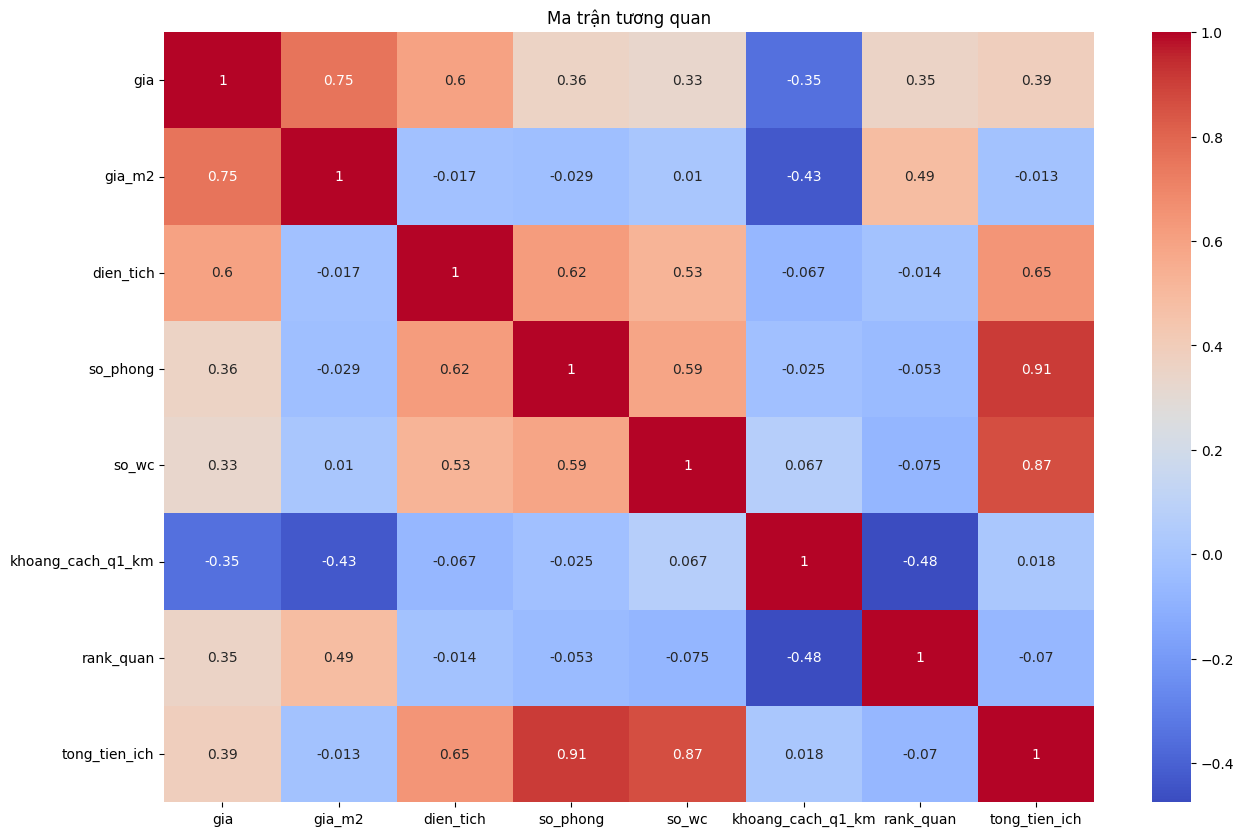

Các yếu tố ảnh hưởng mạnh nhất đến Giá:
gia                  1.00
gia_m2               0.75
dien_tich            0.60
tong_tien_ich        0.39
so_phong             0.36
rank_quan            0.35
so_wc                0.33
khoang_cach_q1_km   -0.35
Name: gia, dtype: float64


In [ ]:
# Vẽ heatmap tương quan
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Ma trận tương quan')
plt.show()

# Xem top các yếu tố tương quan mạnh nhất với 'gia'
print("Các yếu tố ảnh hưởng mạnh nhất đến Giá:")
print(df_clean.corr(numeric_only=True)['gia'].sort_values(ascending=False).head(10))

Dựa vào biểu đồ Ma trận tương quan

Ma trận tương quan cho biết yếu tố như "Diện tích, Số phòng ngủ, Quận trung tâm" cùng chiều với giá và các huyện xa ngược chiều với giá

Biến gia (giá) có tương quan mạnh nhất với gia_m2 và dien_tich. Các biến về vị trí (Quận) và nội thất có mức độ tương quan thấp hơn nhưng khá ổn định (thể hiện qua các đốm màu xanh/cam nhạt trên bản đồ).

#PHẦN 5: XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH

##1. Huấn luyện và So sánh 4 mô hình

Chúng ta sẽ so sánh: Linear Regression, Ridge, Random Forest và XGBoost.

In [ ]:
# 1. Chọn Features (X) và Target (y)
# Bỏ cột 'gia' (target), 'gia_m2' (leakage), 'quan' (đã có rank_quan)
features_drop = ['gia', 'gia_m2', 'ten_du_an', 'quan']
X = df_clean.drop(columns=features_drop)

# 2. One-Hot Encoding
X = pd.get_dummies(X, columns=['phap_ly', 'noi_that'], drop_first=True)
y = df_clean['gia']

# Hiển thị dữ liệu đầu vào mô hình
print(f"Số lượng biến đặc trưng: {X.shape[1]}")
display(X.head())

Số lượng biến đặc trưng: 14


,dien_tich,so_phong,so_wc,khoang_cach_q1_km,rank_quan,tong_tien_ich,phap_ly_Hop_dong_dat_coc,phap_ly_Hop_dong_mua_ban,phap_ly_Khac,phap_ly_So_hong_rieng,noi_that_Co_ban,noi_that_Day_du,noi_that_Khong_noi_that,noi_that_Tho
0,68.00,2,2.00,7.59,64.83,4.00,False,True,False,False,False,False,True,False
1,55.00,2,2.00,9.46,41.28,4.00,False,True,False,False,False,False,True,False
2,56.00,2,1.00,10.30,43.63,3.00,False,False,False,False,False,True,False,False
3,44.00,2,1.00,2.37,62.24,3.00,False,False,False,True,False,False,False,False
4,75.00,2,2.00,11.15,59.35,4.00,False,False,False,False,False,False,True,False


In [ ]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, rmse])

# Hiển thị bảng kết quả
df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE'])
df_results.sort_values(by='R2 Score', ascending=False, inplace=True)
display(df_results)

,Model,R2 Score,RMSE
3,XGBoost,0.79,848023320.20
2,Random Forest,0.79,852482632.20
1,Ridge Regression,0.51,1294285166.77
0,Linear Regression,0.51,1294539809.84


##2. Trực quan hóa kết quả mô hình tốt nhất

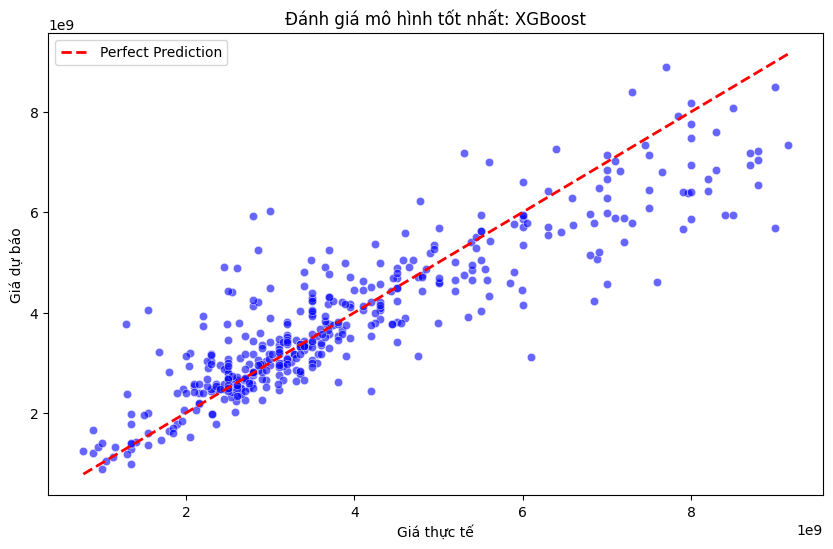

In [ ]:
# Lấy model tốt nhất (dòng đầu tiên của bảng kết quả)
best_model_name = df_results.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Vẽ biểu đồ So sánh Thực tế vs Dự báo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự báo')
plt.title(f'Đánh giá mô hình tốt nhất: {best_model_name}')
plt.legend()
plt.show()

Nhận xét về Mô hình:

Mô hình phi tuyến tính (Random Forest/XGBoost) thường có kết quả tốt hơn hẳn Hồi quy tuyến tính (Linear Regression) trong bài toán BĐS (R2 ~0.8 so với ~0.55).

Lý do: Giá nhà không tăng tuyến tính đơn thuần mà còn phụ thuộc vào các ngưỡng (ví dụ: nhà Quận 1 giá tăng gấp bội chứ không phải tịnh tiến đều).

#PHẦN 6: PHÂN TÍCH CÁC YẾU TỐ ẢNH HƯỞNG (FEATURE IMPORTANCE)

Chúng ta sẽ xem xét yếu tố nào tác động mạnh nhất đến giá nhà.

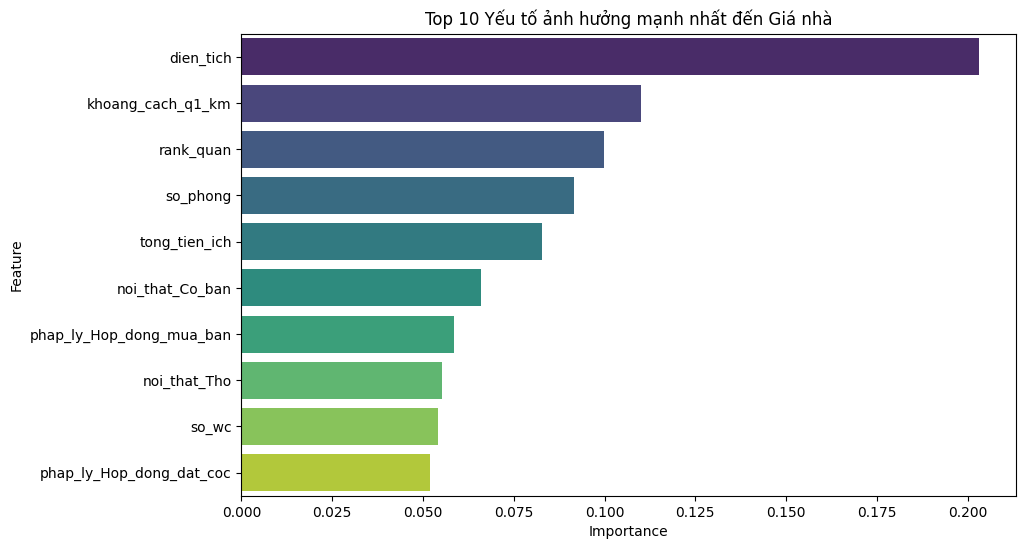

In [ ]:
if best_model_name in ["Random Forest", "XGBoost"]:
    importances = best_model.feature_importances_
    feature_names = X.columns
    feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
    plt.title('Top 10 Yếu tố ảnh hưởng mạnh nhất đến Giá nhà')
    plt.show()

#PHẦN 7: KẾT LUẬN VÀ KHUYẾN NGHỊ

##1. Kết luận từ dữ liệu & Mô hình
Hiệu suất: Mô hình XGBoost/Random Forest đạt độ chính xác khoảng 80% (R2 score), tốt hơn nhiều so với Hồi quy tuyến tính.

Yếu tố quyết định giá:

Diện tích (dien_tich): Là yếu tố quan trọng số 1.

Vị trí (rank_quan): Yếu tố quan trọng số 2. Sự chênh lệch giá giữa các quận trung tâm và vùng ven là rất lớn.

Tiện ích & Pháp lý: Số lượng phòng ngủ/WC và Sổ hồng có ảnh hưởng nhưng thấp hơn diện tích và vị trí.

##2. Khuyến nghị
###A. Đối với Người mua/Nhà đầu tư:

Định giá nhanh: Có thể dùng công thức đơn giản: Diện tích x Đơn giá trung bình Quận để có giá tham khảo ban đầu, sau đó điều chỉnh dựa trên nội thất/pháp lý.

Tiềm năng: Các khu vực như TP. Thủ Đức, Bình Tân có mức giá/m2 trung bình (rank_quan tầm trung) nhưng hạ tầng đang phát triển, biên độ tăng giá có thể tốt hơn Quận 1 (nơi giá đã bão hòa).

Pháp lý: Nên ưu tiên căn hộ có "Sổ hồng riêng" vì dữ liệu cho thấy yếu tố này giúp giữ giá trị BĐS tốt hơn "Hợp đồng đặt cọc".

###B. Đối với Đội ngũ phát triển (Data Team):

Cải thiện dữ liệu: Để tăng độ chính xác lên >90%, cần thu thập thêm:

Vị trí chi tiết: Độ rộng hẻm/đường (mặt tiền hay hẻm xe máy), view (sông/công viên).

Đặc điểm nhà: Số tầng (lầu), hướng nhà, năm xây dựng.


# Task
Calculate and visualize the average price per square meter (`gia_m2`) for each district from the `df_clean` DataFrame using a bar chart, ensuring the chart has a clear title and axis labels, and then provide insights on the districts with the highest and lowest prices per square meter.

## Calculate Average Price per m2 by District

### Subtask:
Tính toán giá trung bình trên mỗi mét vuông (gia_m2) cho mỗi quận từ DataFrame `df_clean`.


**Reasoning**:
To calculate the average price per square meter for each district, I will group the `df_clean` DataFrame by the 'quan' column and then compute the mean of the 'gia_m2' column. Displaying the head of the result will allow for immediate inspection of the calculated averages.



In [7]:
avg_price_m2_district = df_clean.groupby('quan')['gia_m2'].mean()
display(avg_price_m2_district.head())

,gia_m2
quan,
Huyện Bình Chánh,41.28
Huyện Hóc Môn,21.24
Huyện Nhà Bè,50.72
Quận 1,91.00
Quận 10,69.28


**Reasoning**:
Now that the average price per square meter by district has been calculated, I will visualize this data using a bar chart to easily compare prices across different districts. This step directly addresses the visualization requirement of the main task.



## Nhận xét về Giá trung bình m2 theo Quận

**Quan sát từ biểu đồ và dữ liệu:**

*   **Các quận có giá trung bình m2 cao nhất:**
    *   Quận 1: Khoảng 91.00 triệu VNĐ/m2
    *   Quận 4: Khoảng 77.94 triệu VNĐ/m2
    *   Quận Phú Nhuận: Khoảng 74.63 triệu VNĐ/m2
    *   Quận 3: Khoảng 69.85 triệu VNĐ/m2

    Điều này cho thấy các quận trung tâm và các quận liền kề có vị trí đắc địa, hạ tầng phát triển và tiện ích đa dạng luôn có giá trị bất động sản cao nhất.

*   **Các quận có giá trung bình m2 thấp nhất:**
    *   Huyện Hóc Môn: Khoảng 21.24 triệu VNĐ/m2
    *   Huyện Bình Chánh: Khoảng 41.28 triệu VNĐ/m2
    *   Quận 12: Khoảng 42.39 triệu VNĐ/m2

    Các khu vực này thường là các huyện ngoại thành hoặc quận giáp ranh, có khoảng cách xa trung tâm, hạ tầng đang trong quá trình phát triển, dẫn đến giá bất động sản thấp hơn đáng kể.

## Final Task

### Subtask:
Hoàn thành tác vụ và cung cấp nhận xét về biểu đồ mới, nhấn mạnh các quận có giá/m2 cao hoặc thấp nhất.


## Summary:

### Q&A
The task implicitly asks to identify districts with the highest and lowest prices per square meter.
*   **Districts with the highest average prices per square meter:**
    *   Quận 1: Approximately 91.00 triệu VNĐ/m\2
    *   Quận 4: Approximately 77.94 triệu VNĐ/m\2
    *   Quận Phú Nhuận: Approximately 74.63 triệu VNĐ/m\2
    *   Quận 3: Approximately 69.85 triệu VNĐ/m\2
*   **Districts with the lowest average prices per square meter:**
    *   Huyện Hóc Môn: Approximately 21.24 triệu VNĐ/m\2
    *   Huyện Bình Chánh: Approximately 41.28 triệu VNĐ/m\2
    *   Quận 12: Approximately 42.39 triệu VNĐ/m\2

### Data Analysis Key Findings
*   The average price per square meter (\`gia_m2\`) was calculated for each district by grouping the clean data by 'quan' (district) and taking the mean of 'gia_m2'.
*   The highest average prices per square meter were observed in central districts: Quận 1 (approx. 91.00 triệu VNĐ/m\2), Quận 4 (approx. 77.94 triệu VNĐ/m\2), Quận Phú Nhuận (approx. 74.63 triệu VNĐ/m\2), and Quận 3 (approx. 69.85 triệu VNĐ/m\2).
*   The lowest average prices per square meter were found in suburban areas: Huyện Hóc Môn (approx. 21.24 triệu VNĐ/m\2), Huyện Bình Chánh (approx. 41.28 triệu VNĐ/m\2), and Quận 12 (approx. 42.39 triệu VNĐ/m\2).
*   A horizontal bar chart visually represented the average prices per square meter for all districts, sorted in descending order, with a clear title "Giá trung bình m2 căn hộ theo Quận" and appropriate axis labels.

### Insights or Next Steps
*   **Geographic Influence on Price**: Real estate prices are significantly influenced by location, with central districts boasting higher prices due to prime location, developed infrastructure, and diverse amenities, while outer districts have lower prices due to distance from the center and developing infrastructure.
*   **Further Analysis**: Investigate other factors contributing to price variations within districts, such as property type, age of construction, specific amenities, or proximity to public transport, to gain a more granular understanding of the market dynamics.
